# U.S. Macroeconomic Data Analysis

## Introduction

There has been a lot of uncertainty in analyzing where the U.S. economy is heading this year. How will the Federal Reserve determine if increasing nominal interest rates by another 25 basis points is necessary to fight against higher inflation? What would happen to the economy with further tightening of monetary policy? Why does the Federal Reserve aim for inflation of 2% over a longer period? Is the U.S. economy heading for a recession or will there be a "soft landing"?

Federal Reserve officials in recent months emphasized the importance of how their decision will be increasingly data-dependent and for this project, I wanted to explore deeper into the past U.S. macroeconomic data to help better understand the present and prepare for the future amid economic uncertainty.

I will be analyzing the [U.S. macroeconomic data](https://www.statsmodels.org/stable/datasets/generated/macrodata.html) provided on statsmodels and [kaggle](https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators) using data that's been collected from [The World Bank Group](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets).

---

## Leading Economic Indicators

### What Is a Leading Indicator?

According to [Investopedia](https://www.investopedia.com/terms/l/leadingindicator.asp):

> A leading indicator is a measurable set of data that may help to forecast future economic activity. Leading economic indicators can be used to predict changes in the economy before the economy begins to shift in a particular direction. They have the potential to be useful for businesses, investors, and policy makers. Leading indicators are not always accurate. However, looking at several leading indicators in conjunction with other types of data may provide actionable information about the future health of an economy.

The datasets have been uploaded [here](https://github.com/tylerchg/Project_1). Please see below the summarized information:

**Statsmodels**

- `Year` - 1959Q1-2009Q3 

- `Quarter` - 1-4

- `Realgdp` - Real gross domestic product (Bil. of chained 2005 US$, seasonally adjusted annual rate)

- `Realcons` - Real personal consumption expenditures (Bil. of chained 2005 US$, seasonally adjusted annual rate)

- `Realinv` - Real gross private domestic investment (Bil. of chained 2005 US$, seasonally adjusted annual rate)

- `Cpi` - End of the quarter consumer price index for all urban consumers: all items (1982-84 = 100, seasonally adjusted)

- `Unemp` - Seasonally adjusted unemployment rate (%)

- `Infl` - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)

- `Realint` - Real interest rate (tbilrate - infl)

**The World Bank Group**

- `Country` - The country or geographic region (United States)

- `Date` - Date of the measurement (1960-2022)

- `Inflation_annual%` - Inflation, consumer prices, as annual %

- `Real_interest_rate` - Real interest rate (%)

- `Risk_premium_on_lending` - Risk premium on lending (lending rate minus treasury bill rate, %)

- `Doing_business` - Ease of doing business score (0 = lowest performance to 100 = best performance)

- `Gdp_current_us` - GDP (current US$)

- `Gini_index` - Gini index

Note: The following selection of variables was based on the [Top 10 U.S. Economic Indicators](https://www.investopedia.com/articles/personal-finance/020215/top-ten-us-economic-indicators.asp).

---

## Questions I wanted to answer:

- Does lower real interest rates result in higher unemployment and inflation rates? What were the leading economic indicators like during past recessions?

- What were the unemployment and real interest rates like when inflation rates were less than or equal to 2%?

- When did the U.S. economy (in years) have the highest unemployment when inflation rates were less than or equal to 2%?

- When did the U.S. economy (in years) have the highest inflation rates?

- How does real interest rates affect monetary policy changes and why is it important to the Federal Reserve?

---

## Assessing Data

Required libraries and datasets for this project:

- Pandas - Data manipulation

- NumPy - Data arrays

- Matplotlib & Seaborn - Data visualisation


In [81]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Loading datasets
data = pd.read_csv('macrodata.csv')
data2 = pd.read_csv('world_bank_development_indicators.csv')

Reviewing datasets using `.head()`.

In [3]:
# Dataset from statsmodels
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
# Dataset from kaggle (collected from The World Bank Group)
data2.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


Getting information and preparing datasets:
- How many samples (rows/observations) and columns are in both datasets?
- Are there any duplicates?
- What are the data types?
- Are there any missing values?
- What are the unique values and the count?


In [5]:
# Getting the number of samples and columns for both datasets
data.shape, data2.shape

((203, 14), (16780, 50))

In [6]:
# Figuring out if there are any rows with duplicates
data.duplicated().sum(), data2.duplicated().sum()

(0, 0)

In [7]:
# Data type of each column
data.info(), data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     

(None, None)

Using `.info()` shows some features have missing values.
Running `.isnull().sum()` will show which features have missing values and how many there are. 

In [8]:
# Features with missing values
data.isnull().sum(), data2.isnull().sum()

(year        0
 quarter     0
 realgdp     0
 realcons    0
 realinv     0
 realgovt    0
 realdpi     0
 cpi         0
 m1          0
 tbilrate    0
 unemp       0
 pop         0
 infl        0
 realint     0
 dtype: int64,
 country                                          0
 date                                             0
 agricultural_land%                            1482
 forest_land%                                  8866
 land_area                                     1172
 avg_precipitation                             6694
 trade_in_services%                            7615
 control_of_corruption_estimate               12216
 control_of_corruption_std                    12216
 access_to_electricity%                        9432
 renewvable_energy_consumption%                8704
 electric_power_consumption                    8990
 CO2_emisions                                  9372
 other_greenhouse_emisions                     9372
 population_density                            

In [9]:
# Figuring out the number of non-null unique values for each features in both datasets
data.nunique(), data2.nunique()

(year         51
 quarter       4
 realgdp     203
 realcons    202
 realinv     203
 realgovt    203
 realdpi     203
 cpi         203
 m1          200
 tbilrate    183
 unemp        56
 pop         203
 infl        179
 realint     177
 dtype: int64,
 country                                        268
 date                                            63
 agricultural_land%                           10553
 forest_land%                                  6468
 land_area                                     1923
 avg_precipitation                              182
 trade_in_services%                            9005
 control_of_corruption_estimate                4434
 control_of_corruption_std                     2564
 access_to_electricity%                        4331
 renewvable_energy_consumption%                5413
 electric_power_consumption                    7614
 CO2_emisions                                  7176
 other_greenhouse_emisions                     7315
 population_density

`.nunique()` is only showing 56 unique values for `unemp`. Running `.unique()` will show what they are.

In [10]:
data['unemp'].unique()

array([ 5.8,  5.1,  5.3,  5.6,  5.2,  6.3,  6.8,  7. ,  6.2,  5.5,  5.7,
        5. ,  4.9,  4.7,  4.4,  4.1,  3.9,  3.8,  3.7,  3.5,  3.4,  3.6,
        4.2,  4.8,  5.9,  6. ,  6.6,  8.2,  8.9,  8.5,  8.3,  7.7,  7.6,
        7.8,  7.5,  7.1,  6.9,  7.3,  7.4,  8.8,  9.4,  9.9, 10.7, 10.4,
       10.1,  7.9,  7.2,  5.4,  6.1,  4.6,  4.5,  4.3,  4. ,  8.1,  9.2,
        9.6])

---

## Data Wrangling

Creating a time based index of periods consisting of the year and quarter before dropping any extraneous columns for `macrodata.csv` using pandas `pd.PeriodIndex()` function.

In [11]:
# Creating a time based index of periods consisting of the year and quarter
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = 'date')

# Confirmation of changes
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [12]:
# Changing '1959Q1' to a date '1959-01-01'
periods.to_timestamp('D', 'start')

DatetimeIndex(['1959-01-01', '1959-04-01', '1959-07-01', '1959-10-01',
               '1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01',
               ...
               '2007-04-01', '2007-07-01', '2007-10-01', '2008-01-01',
               '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
               '2009-04-01', '2009-07-01'],
              dtype='datetime64[ns]', name='date', length=203, freq='QS-OCT')

In [13]:
# Current index is just integers and need to replace it
data.index

RangeIndex(start=0, stop=203, step=1)

In [14]:
# Specifying a new index directly
data.index = periods.to_timestamp('D', 'start')

#### Dropping extraneous columns and conforming to the column index specified for `macrodata.csv` dataset:

In [15]:
# Selecting the columns with the items to focus on
columns = pd.Index(['realgdp', 'realcons', 'realinv', 'cpi', 'unemp', 'infl', 'realint'], name = 'item')

# Confirmation of changes
columns

Index(['realgdp', 'realcons', 'realinv', 'cpi', 'unemp', 'infl', 'realint'], dtype='object', name='item')

In [16]:
# Conforming to the column index specified
data = data.reindex(columns = columns)

# Confirmation of changes
data.head()

item,realgdp,realcons,realinv,cpi,unemp,infl,realint
date,,,,,,,
1959-01-01,2710.349,1707.4,286.898,28.98,5.8,0.00,0.00
1959-04-01,2778.801,1733.7,310.859,29.15,5.1,2.34,0.74
1959-07-01,2775.488,1751.8,289.226,29.35,5.3,2.74,1.09
1959-10-01,2785.204,1753.7,299.356,29.37,5.6,0.27,4.06
1960-01-01,2847.699,1770.5,331.722,29.54,5.2,2.31,1.19


#### Dropping extraneous columns and conforming to the column index specified for `world_bank_development_indicators.csv` dataset:

In [17]:
# Selecting the columns with the items to focus on
columns = pd.Index(['country', 'date', 'inflation_annual%', 'real_interest_rate', 'risk_premium_on_lending', 'doing_business', 'GDP_current_US', 'gini_index'], name = 'item')

# Confirmation of changes
columns

Index(['country', 'date', 'inflation_annual%', 'real_interest_rate',
       'risk_premium_on_lending', 'doing_business', 'GDP_current_US',
       'gini_index'],
      dtype='object', name='item')

In [18]:
# Conforming to the column index specified
data2 = data2.reindex(columns = columns)

# Confirmation of changes
data2.head()

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,5.377778e+08,NaN
1,Afghanistan,1961-01-01,NaN,NaN,NaN,NaN,5.488889e+08,NaN
2,Afghanistan,1962-01-01,NaN,NaN,NaN,NaN,5.466667e+08,NaN
3,Afghanistan,1963-01-01,NaN,NaN,NaN,NaN,7.511112e+08,NaN
4,Afghanistan,1964-01-01,NaN,NaN,NaN,NaN,8.000000e+08,NaN


#### Creating a new dataset of `world_bank_development_indicators.csv` to contain information only for the United States before starting the analysis and renaming it `us_development_indicators.csv`:

In [19]:
# Creating a new dataset only containing United States
specific_country = ['United States']
data2[data2['country'].isin(specific_country)]

f_data2 = data2[data2['country'].isin(specific_country)]
f_data2.to_csv('us_development_indicators.csv')

# Confirmation of changes
f_data2.head()

item,country,date,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
15961,United States,1960-01-01,1.457976,NaN,1.874167,NaN,5.433000e+11,NaN
15962,United States,1961-01-01,1.070724,3.107885,2.124167,NaN,5.633000e+11,NaN
15963,United States,1962-01-01,1.198773,3.215346,1.721667,NaN,6.051000e+11,NaN
15964,United States,1963-01-01,1.239669,3.374882,1.343333,NaN,6.386000e+11,NaN
15965,United States,1964-01-01,1.278912,2.951669,0.947500,NaN,6.858000e+11,NaN


---

## Data Analysis and Visualization

Before analyzing the datasets, it is important to know how each leading economic indicator affects one another. Usually, when the Federal Reserve raises interest rates, unemployment numbers go up and it could lead to a potential decline in equities. Higher interest rates make borrowing costs more expensive for businesses (impacting their profitability) while rising unemployment suggests a slowdown in U.S. economic growth.

### What's a Recession?

According to [Investopedia](https://www.investopedia.com/articles/economics/08/past-recessions.asp):

> Recessions are sometimes defined as two consecutive quarters of decline in real Gross Domestic Product (GDP), which measures the combined value of all the goods and services produced in an economy. In the U.S., the National Bureau of Economic Research (NBER) defines a recession as "a significant decline in economic activity that is spread across the economy and lasts more than a few months." The NBER dates recessions based on indicators including GDP, payroll employment, personal income and spending, industrial production, and retail sales.

When GDP is growing rapidly, that means more jobs are being created. When GDP is shrinking or growing slowly, then that is a leading indicator that parts of the economy are in trouble. The unemployment rate is a measure of workplace participation of how many people are looking for work.

According to the [Taylor Rule](https://www.investopedia.com/terms/t/taylorsrule.asp), as inflation increases above the central bank's target level, raising nominal interest rates is a method of controlling inflationary pressures. This suggests a positive relationship between inflation and interest rates, as higher inflation leads to higher nominal interest rates.

**Note: (Real Interest Rate = Nominal Interest Rate - Inflation Rate)**

Also, higher real interest rates mean an increase in borrowing costs. This can cause people to curb spending and borrowing (slowing economic activity). A negative real interest rate environment means that inflation is greater than the nominal interest rate. The purchasing power of the dollar being saved is decreasing as the cost of goods and services is increasing at a faster pace than the interest earned on the savings. This can happen when the central bank sets a very low nominal interest rate to stimulate economic growth (like during the pandemic).

### Q1: Does lower real interest rates result in higher unemployment and inflation rates? What were the leading economic indicators like during past recessions?

During a recession, output falls and unemployment rises. In response, the central bank usually cuts the nominal interest rate in an attempt to return output and employment to normal levels. However, the nominal interest rate cannot go below 0.

Most economists agree that deflation is worse than a medium amount of inflation because deflation can discourage consumption and new investments. Having a higher inflation target can help the economy avoid falling into a deflationary period and provide the central bank more room to lower the real interest rates to stimulate the economy.


#### Periods of all official U.S. recessions since [1960](https://www.investopedia.com/articles/economics/08/past-recessions.asp):

- The 'Rolling Adjustment' Recession: April 1960 - February 1961

- The Guns and Butter Recession: December 1969 – November 1970

- The Oil Embargo Recession: November 1973 – March 1975

- The Iran and Volcker Recession, Part 1: January 1980 – July 1980

- Part 2 of Double-Dip Recession: July 1981 – November 1982

- The Gulf War Recession: July 1990 – March 1991

- The Dot-Bomb Recession: March 2001 – November 2001

- The Great Recession: December 2007 – June 2009

- The COVID-19 Recession: February 2020 – April 2020

In [35]:
# Descriptive statistical analysis of the dataset from statsmodels (Periods from 1960-2009)
data.describe()

item,realgdp,realcons,realinv,cpi,unemp,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,4825.293103,1012.863862,105.075788,5.884729,3.961330,1.336502
std,3214.956044,2313.346192,585.102267,61.278878,1.458574,3.253216,2.668799
min,2710.349000,1707.400000,259.764000,28.980000,3.400000,-8.790000,-6.790000
25%,4440.103500,2874.100000,519.147500,41.050000,4.900000,2.270000,-0.085000
50%,6559.594000,4299.900000,896.210000,104.100000,5.700000,3.240000,1.340000
75%,9629.346500,6398.150000,1436.681500,159.650000,6.800000,4.975000,2.630000
max,13415.266000,9363.600000,2264.721000,218.610000,10.700000,14.620000,10.950000


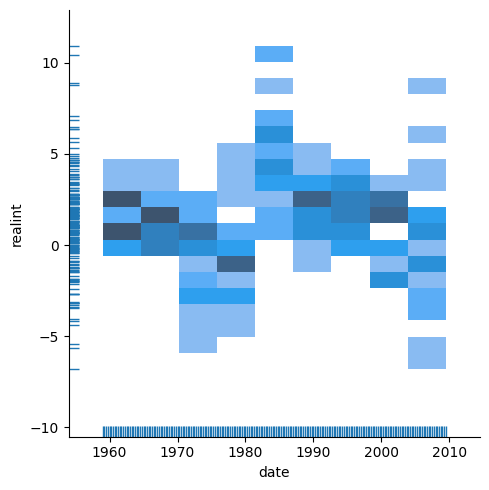

In [38]:
# Bivariate and Multivariate Plots
sns.displot(data = data, x = "date", y = "realint", rug = True)

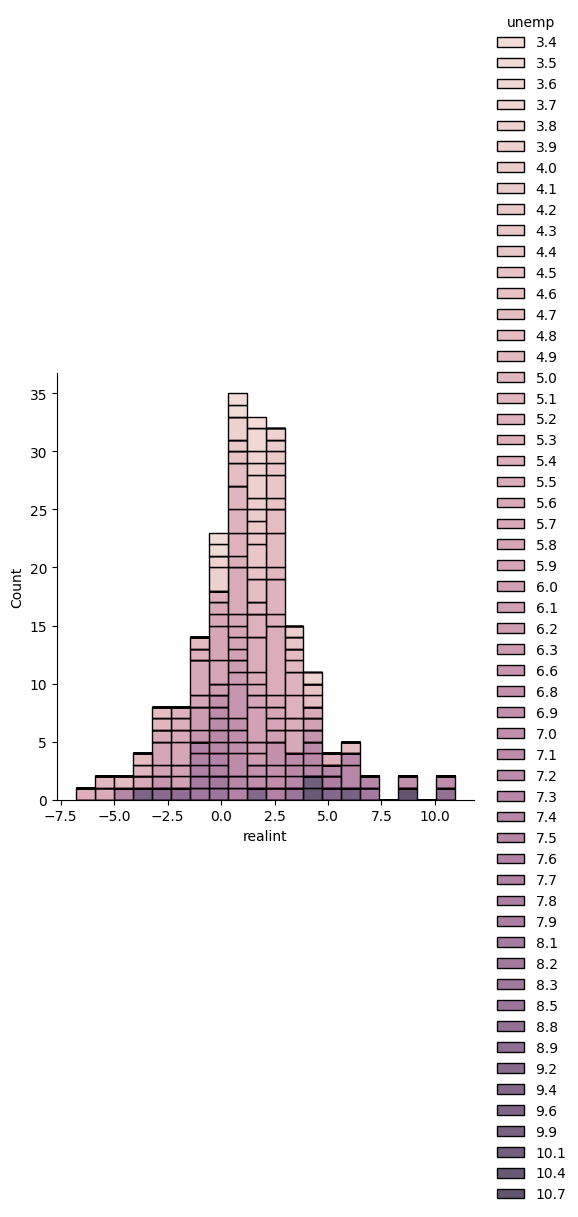

In [54]:
sns.displot(data = data, x = "realint", hue = "unemp", multiple = "stack")

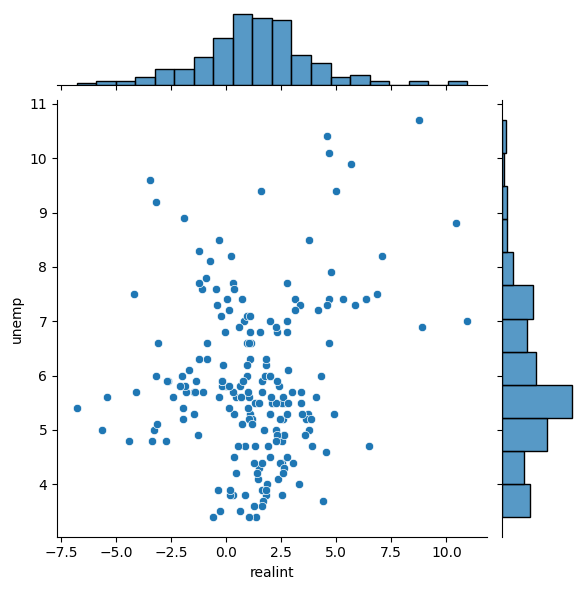

In [71]:
sns.jointplot(data = data, x = "realint", y = "unemp")

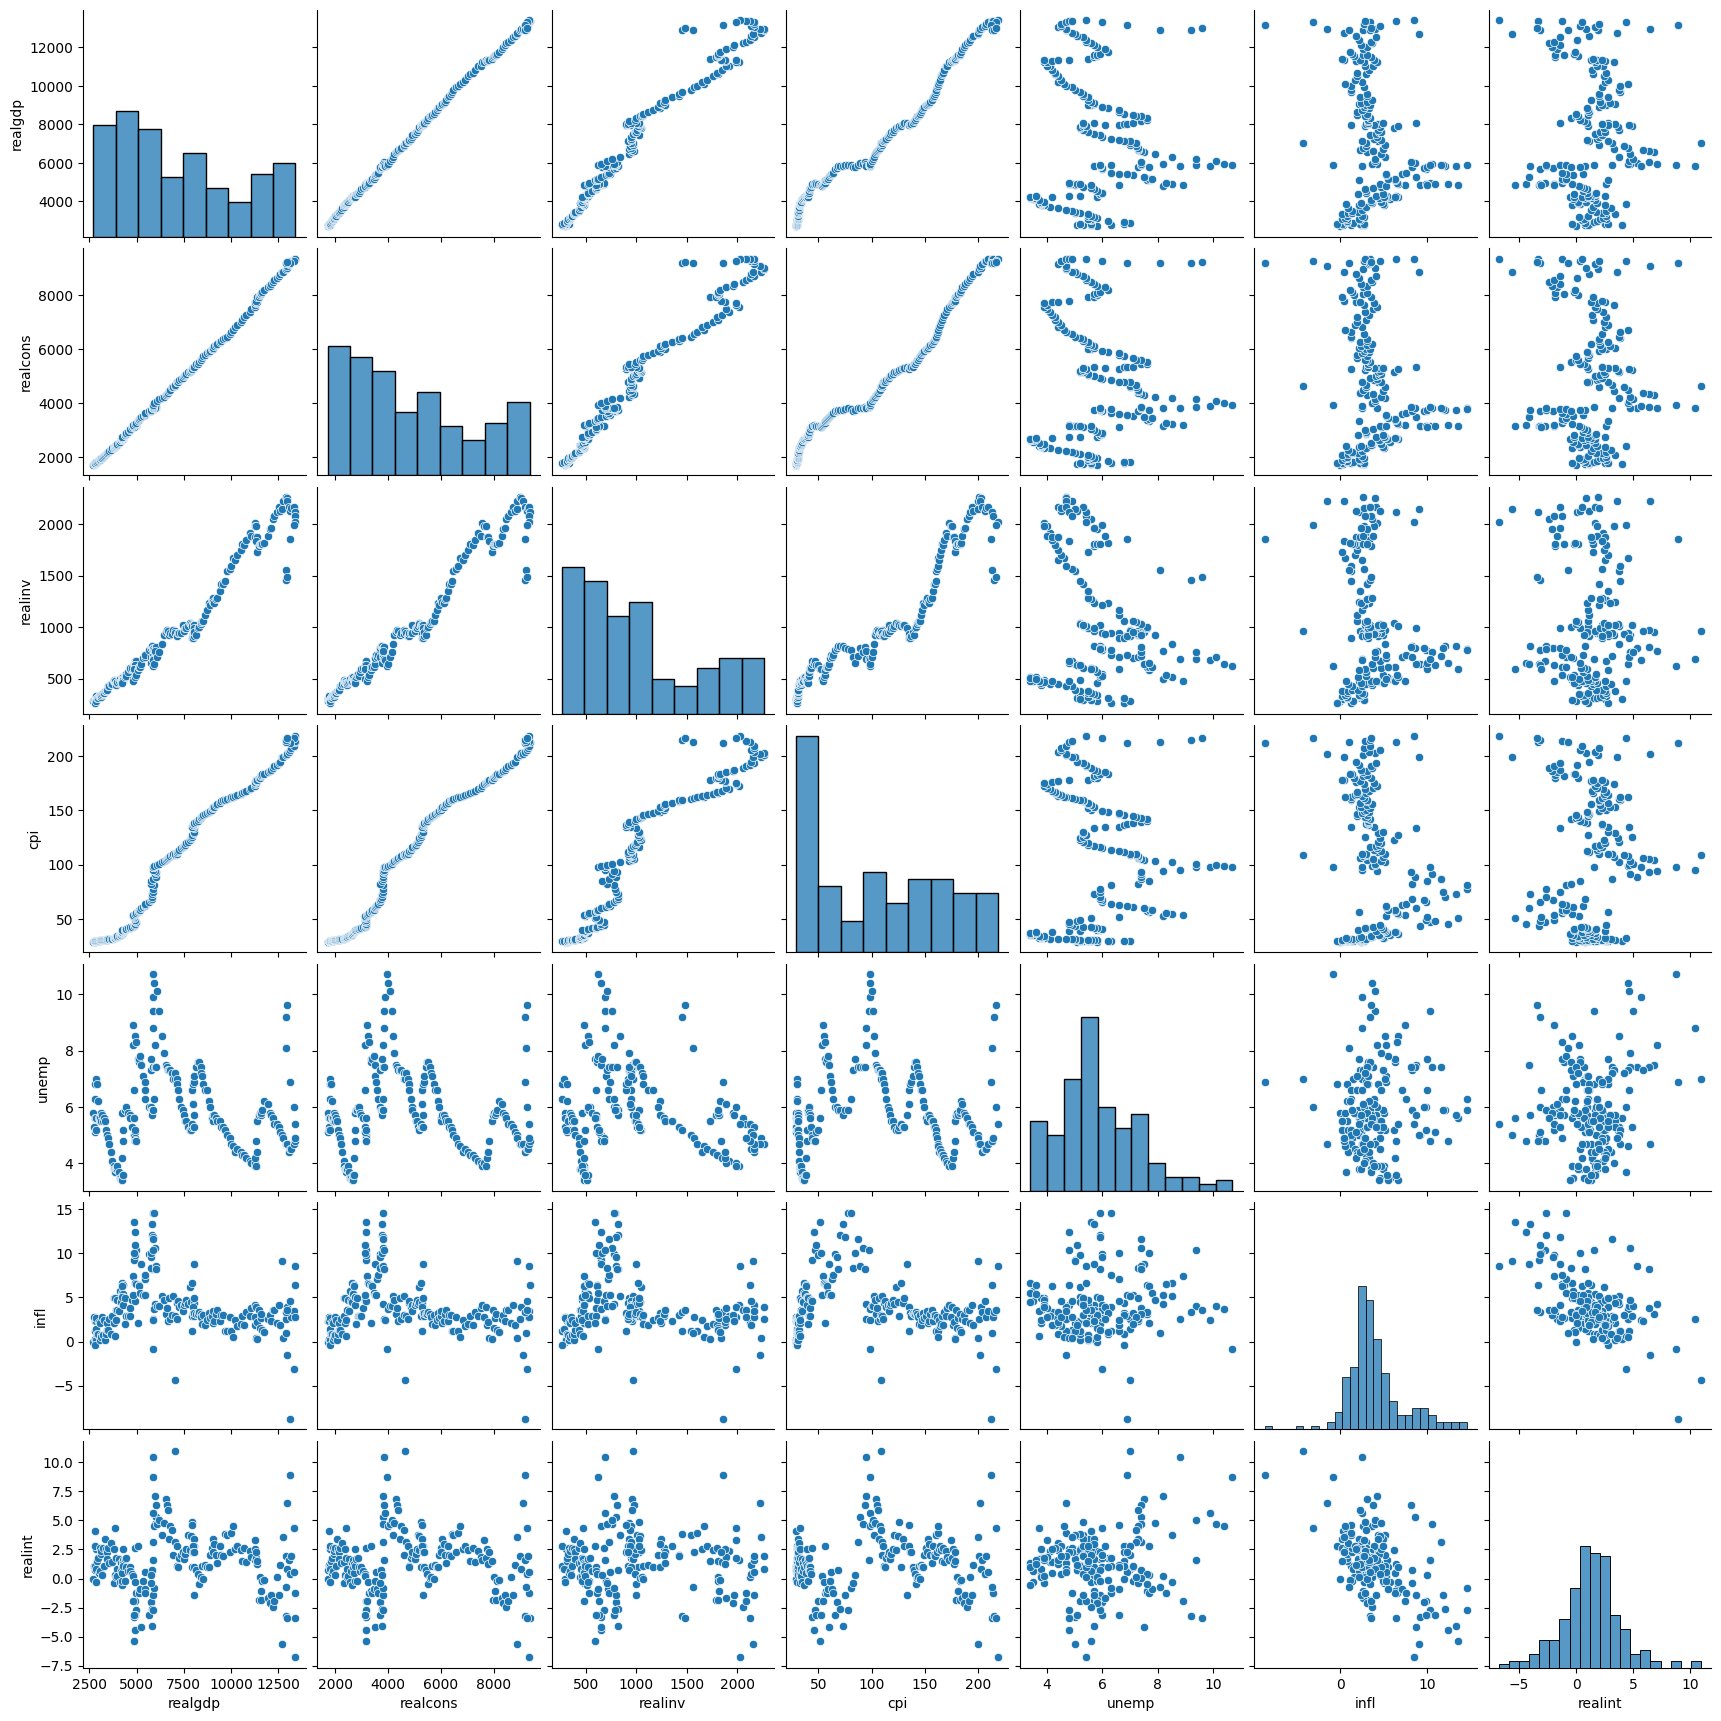

In [64]:
sns.pairplot(data)

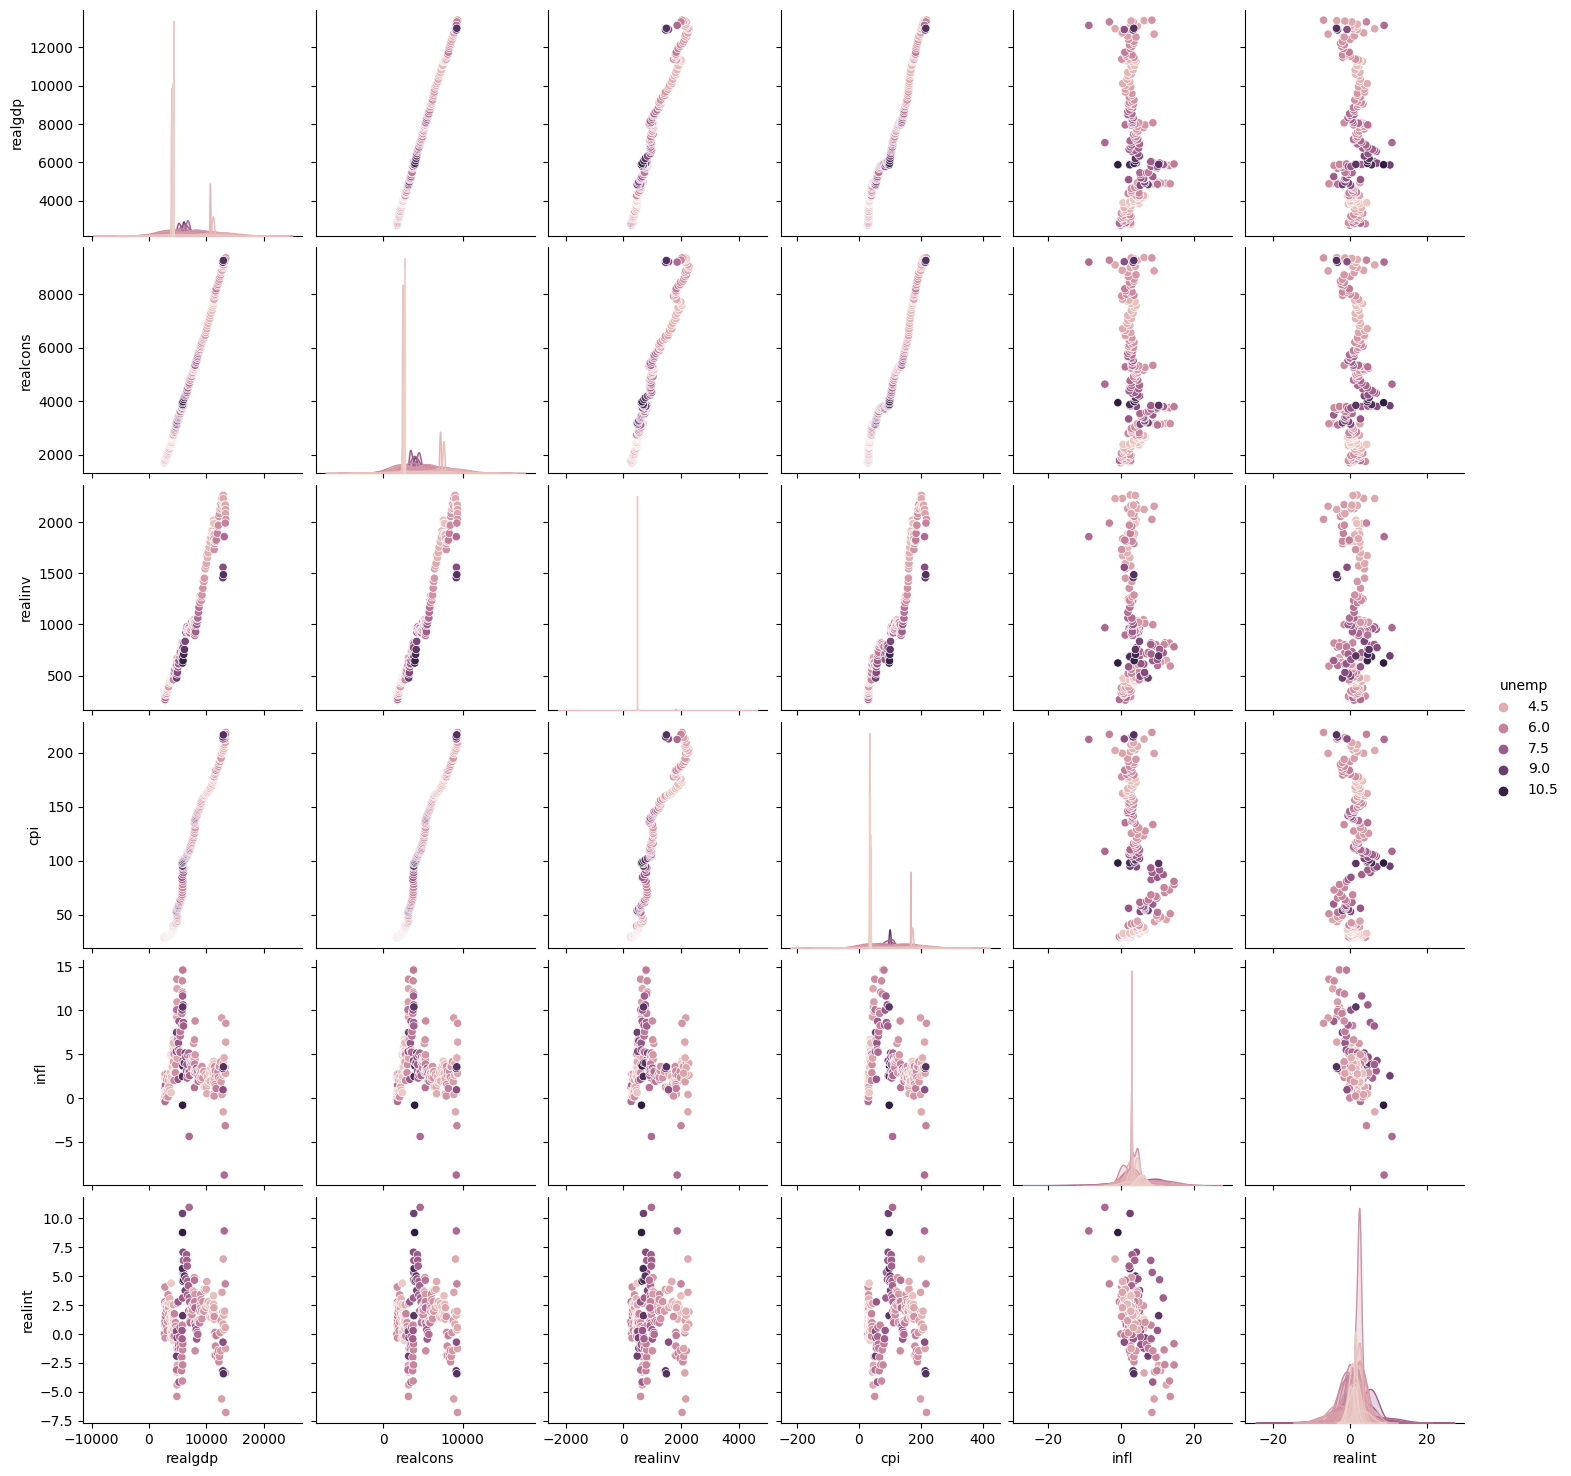

In [63]:
sns.pairplot(data, hue = "unemp")

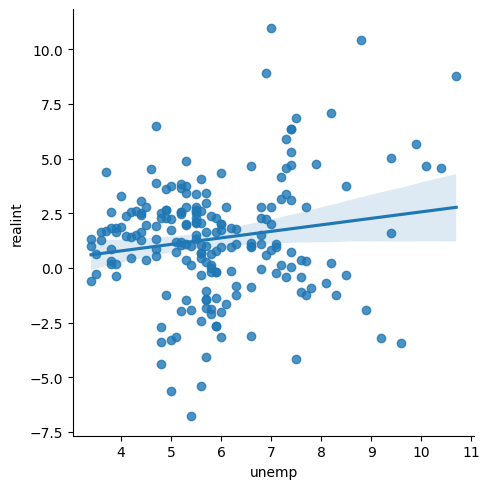

In [80]:
sns.lmplot(x = "unemp", y = "realint", data= data)

In [65]:
# Descriptive statistical analysis of the dataset from kaggle (Periods from 2010-2021)
data2.describe()

item,inflation_annual%,real_interest_rate,risk_premium_on_lending,doing_business,GDP_current_US,gini_index
count,10775.000000,4397.000000,2367.000000,189.000000,1.336500e+04,1936.000000
mean,20.032626,5.428473,5.920715,95.925926,1.206985e+12,37.972831
std,291.456518,15.601893,7.137317,54.823361,5.412748e+12,8.958106
min,-17.640424,-97.693477,-31.502949,1.000000,8.824746e+06,20.700000
25%,2.379382,1.723513,2.608417,49.000000,2.523472e+09,31.200000
50%,4.905312,5.481541,4.606667,96.000000,1.842778e+10,35.800000
75%,9.719648,9.770488,7.154302,143.000000,2.243835e+11,43.400000
max,23773.131774,628.319666,67.841537,190.000000,1.005620e+14,65.800000


In [87]:
## (Cont)